In [101]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [102]:
from nltk.corpus import wordnet as wn
import re

compound_pattern = re.compile(r'^[a-z]+(-|_)[a-z]+$')

def is_compound(word):
    """Check if a word is a compound by seeing if it consists of multiple words."""
    return bool(compound_pattern.match(word))

def get_compound_words():
    compound_words = []
    for synset in wn.all_synsets(pos='n'):
        for lemma in synset.lemmas():
            word = lemma.name()
            if is_compound(word):
                compound_words.append(word)
    return set(compound_words)

compound_words = get_compound_words()
print(f'Found {len(compound_words)} compound words:')
for word in sorted(compound_words):
    print(word)


Found 31445 compound words:
abandoned_infant
abandoned_person
abandoned_ship
abasia_trepidans
abatable_nuisance
abdominal_actinomycosis
abdominal_aorta
abdominal_breathing
abdominal_cavity
abdominal_delivery
abdominal_muscle
abdominal_pregnancy
abdominal_wall
abducens_muscle
abducens_nerve
abducent_nerve
abductor_muscle
ablative_absolute
ablative_case
able-bodiedism
able-bodism
able_seaman
abnormal_psychology
abominable_snowman
abortion_pill
about-face
about_turn
abrading_stone
abrasive_material
abruptio_placentae
abscessed_tooth
absence_seizure
absentee_ballot
absentee_rate
absinthe_oil
absolute_alcohol
absolute_ceiling
absolute_frequency
absolute_magnitude
absolute_majority
absolute_pitch
absolute_scale
absolute_space
absolute_temperature
absolute_threshold
absolute_value
absolute_viscosity
absolute_zero
absorbent_cotton
absorbent_material
absorption_band
absorption_coefficient
absorption_factor
absorption_indicator
absorption_spectrum
absorption_unit
abstract_art
abstract_artist
abs

In [113]:
def is_used_as_standalone_noun(word):
    synsets = wn.synsets(word)
    if not synsets:
        return False
    
    for synset in synsets:
        if synset.pos() != 'n':
            continue

        for lemma in synset.lemmas():
            if lemma.name() != word:
                continue

            # if lemma.count() == 0:
            #     continue

            return True
    
    return False

is_used_as_standalone_noun('mattress')

False

In [114]:
# Filter the compounds so that both parts of the compound are standalone nouns

def is_noun_noun_compound(compound):
    parts = re.split('-|_', compound)
    return is_used_as_standalone_noun(parts[0]) and is_used_as_standalone_noun(parts[1])

noun_noun_compounds = set(filter(is_noun_noun_compound, compound_words))
print(f'Found {len(noun_noun_compounds)} noun-noun compounds:')
for word in sorted(noun_noun_compounds):
    print(word)

Found 12786 noun-noun compounds:
abortion_pill
absence_seizure
absolute_alcohol
absolute_ceiling
absolute_frequency
absolute_magnitude
absolute_majority
absolute_pitch
absolute_scale
absolute_space
absolute_temperature
absolute_threshold
absolute_value
absolute_viscosity
absolute_zero
absorption_band
absorption_coefficient
absorption_factor
absorption_indicator
absorption_spectrum
absorption_unit
abstract_art
abstract_artist
abstract_entity
abstract_thought
academic_administrator
academic_costume
academic_degree
academic_department
academic_freedom
academic_gown
academic_program
academic_relation
academic_requirement
academic_robe
academic_session
academic_term
academic_year
acceleration_unit
accelerator_factor
accent_mark
acceptance_sampling
access_code
access_road
access_time
accessory_fruit
accessory_nerve
account_book
account_executive
account_representative
account_statement
accounting_data
accounting_entry
accounting_firm
accounting_principle
accounting_standard
accounting_system

In [105]:
# Display the words filterd out
print(f'Found {len(compound_words - noun_noun_compounds)} compounds that are not noun-noun compounds:')
for word in sorted(compound_words - noun_noun_compounds):
    print(word)

Found 18659 compounds that are not noun-noun compounds:
abandoned_infant
abandoned_person
abandoned_ship
abasia_trepidans
abatable_nuisance
abdominal_actinomycosis
abdominal_aorta
abdominal_breathing
abdominal_cavity
abdominal_delivery
abdominal_muscle
abdominal_pregnancy
abdominal_wall
abducens_muscle
abducens_nerve
abducent_nerve
abductor_muscle
ablative_absolute
ablative_case
able-bodiedism
able-bodism
able_seaman
abnormal_psychology
abominable_snowman
about-face
about_turn
abrading_stone
abrasive_material
abruptio_placentae
abscessed_tooth
absentee_ballot
absentee_rate
absinthe_oil
absorbent_cotton
absorbent_material
abutment_arch
abyssal_zone
acanthosis_nigricans
acanthus_family
acaroid_resin
accaroid_resin
accelerator_pedal
accentual_system
accident_surgery
accidental_injury
accommodation_endorser
accommodation_ladder
accommodation_reflex
accompanying_vein
accomplished_fact
accordion_door
account_payable
accounts_payable
accounts_receivable
accroides_gum
accroides_resin
accrual_b

In [106]:
import pandas as pd

# Create a new dataframe for the compounds from WordNet. Columns: compound, modifier, head
compound_data = []
for compound in noun_noun_compounds:
    modifier, head = re.split('-|_', compound)
    compound_name = compound.replace('_', ' ')
    compound_data.append((compound_name, modifier, head))

compound_df = pd.DataFrame(compound_data, columns=['name', 'modifier', 'head'])
compound_df

,name,modifier,head
0,law practice,law,practice
1,black beech,black,beech
2,dead reckoning,dead,reckoning
3,iron-tree,iron,tree
4,sex offense,sex,offense
...,...,...,...
12781,sheep gadfly,sheep,gadfly
12782,spider orchid,spider,orchid
12783,wind tee,wind,tee
12784,war power,war,power


In [107]:
# Add the ladec data to the dataframe
ladec_df = pd.read_csv('./LADECv1-2019.csv')

# Only keep the non-plural values
ladec_df = ladec_df[ladec_df['isPlural'] == 0]

# Only keep the corret parses
ladec_df = ladec_df[ladec_df['correctParse'] == "yes"]

# Only keep the columns we need
ladec_df = ladec_df[['stim', 'c1', 'c2']]
ladec_df.columns = ['name', 'modifier', 'head']
ladec_df

,name,modifier,head
0,gadabout,gad,about
1,knockabout,knock,about
2,turnabout,turn,about
3,raceabout,race,about
4,walkabout,walk,about
...,...,...,...
8935,farmyard,farm,yard
8936,boatyard,boat,yard
8937,steelyard,steel,yard
8938,shipyard,ship,yard


In [108]:
# Merge the two dataframes
merged_df = pd.concat([compound_df, ladec_df])
merged_df

,name,modifier,head
0,law practice,law,practice
1,black beech,black,beech
2,dead reckoning,dead,reckoning
3,iron-tree,iron,tree
4,sex offense,sex,offense
...,...,...,...
8935,farmyard,farm,yard
8936,boatyard,boat,yard
8937,steelyard,steel,yard
8938,shipyard,ship,yard


In [109]:
# Load the frequency data
df_freq_bigram = pd.read_csv('./frequency_data/bigram_freq.csv', names=['modifier', 'head', 'freq'])
df_freq_word = pd.read_csv('./frequency_data/word_freq.csv', names=['word', 'freq'])

In [110]:
df_merged_with_bigram_freq = merged_df.merge(df_freq_bigram, on=['modifier', 'head'], how='left')
df_merged_with_bigram_freq.rename(columns={'freq': 'bigram_freq'}, inplace=True)
df_merged_with_freq = df_merged_with_bigram_freq.merge(df_freq_word, left_on='name', right_on='word', how='left')
df_merged_with_freq.drop(columns='word', inplace=True)
df_merged_with_freq.rename(columns={'freq': 'word_freq'}, inplace=True)
df_merged_with_freq

,name,modifier,head,bigram_freq,word_freq
0,law practice,law,practice,19.0,NaN
1,black beech,black,beech,NaN,NaN
2,dead reckoning,dead,reckoning,2.0,NaN
3,iron-tree,iron,tree,NaN,NaN
4,sex offense,sex,offense,5.0,NaN
...,...,...,...,...,...
18406,farmyard,farm,yard,NaN,10.0
18407,boatyard,boat,yard,10.0,13.0
18408,steelyard,steel,yard,NaN,NaN
18409,shipyard,ship,yard,NaN,42.0


In [111]:
import math 
import numpy as np

max_freq = 1840078     # Maximum frequency in the word_freq dataset

def freq_class_formula(freq):
    """ Calculate the frequency class of a word based on the definition by the german derewo dataset."""
    return int(math.floor(math.log2(max_freq/freq)+0.5))

def calculate_freq_class(word_freq, bigram_freq):
    freq = np.nanmax([word_freq, bigram_freq])
    if np.isnan(freq):
        return np.nan
    
    return freq_class_formula(freq)


df_merged_with_freq['freq_class'] = df_merged_with_freq.apply(lambda row: calculate_freq_class(row['word_freq'], row['bigram_freq']), axis=1)
df_merged_with_freq

C:\Users\Martin\AppData\Local\Temp\ipykernel_17444\2496206299.py:11: RuntimeWarning: All-NaN axis encountered
  freq = np.nanmax([word_freq, bigram_freq])


,name,modifier,head,bigram_freq,word_freq,freq_class
0,law practice,law,practice,19.0,NaN,17.0
1,black beech,black,beech,NaN,NaN,NaN
2,dead reckoning,dead,reckoning,2.0,NaN,20.0
3,iron-tree,iron,tree,NaN,NaN,NaN
4,sex offense,sex,offense,5.0,NaN,18.0
...,...,...,...,...,...,...
18406,farmyard,farm,yard,NaN,10.0,17.0
18407,boatyard,boat,yard,10.0,13.0,17.0
18408,steelyard,steel,yard,NaN,NaN,NaN
18409,shipyard,ship,yard,NaN,42.0,15.0


In [112]:
df_merged_with_freq['freq_class'].value_counts(dropna=False).sort_index().cumsum()

6.0         1
7.0         2
8.0         6
9.0        20
10.0       38
11.0       86
12.0      183
13.0      403
14.0      797
15.0     1607
16.0     2855
17.0     4402
18.0     6204
19.0     7579
20.0     8694
21.0    10588
NaN     18411
Name: freq_class, dtype: int64

In [83]:
df_sorted = df_merged_with_freq.sort_values('freq_class', ascending=True)

# Display compounds with the same modifier and head
df_sorted[df_sorted.duplicated(subset=['modifier', 'head'], keep=False)]

,name,modifier,head,bigram_freq,word_freq,freq_class
23909,goodbye,good,bye,227.0,5820.0,8.0
26951,highschool,high,school,2653.0,9.0,9.0
439,high school,high,school,2653.0,NaN,9.0
6739,good-bye,good,bye,227.0,2509.0,10.0
24854,motherfucker,mother,fucker,63.0,2523.0,10.0
...,...,...,...,...,...,...
28420,silverworker,silver,worker,NaN,NaN,NaN
28422,guestworker,guest,worker,NaN,NaN,NaN
28449,armyworm,army,worm,NaN,NaN,NaN
28497,swallowwort,swallow,wort,NaN,NaN,NaN


In [84]:
# Drop the duplicates
df_duplicate_free = df_sorted.drop_duplicates(subset=['modifier', 'head'], keep='first')
print(f'Dropped {len(df_sorted) - len(df_duplicate_free)} duplicates')

Dropped 776 duplicates


In [85]:
df_final = df_duplicate_free[['name', 'modifier', 'head', 'freq_class']]

# Sort the df by frequency class and then alphabetically by name
df_final = df_final.sort_values('name', ascending=True)

# Save the data to a csv file
df_final.to_csv('compounds_data/cleansed_and_with_freq.csv', index=False)

# Analysis

In [86]:
# Create a fourfold table with the boolean variables bigram_freq==NaN and word_freq==NaN
df_duplicate_free['bigram_freq_nan'] = df_duplicate_free['bigram_freq'].isna()
df_duplicate_free['word_freq_nan'] = df_duplicate_free['word_freq'].isna()

fourfold_table = pd.crosstab(df_duplicate_free['bigram_freq_nan'], df_duplicate_free['word_freq_nan'])
fourfold_table

C:\Users\Martin\AppData\Local\Temp\ipykernel_17444\971938952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate_free['bigram_freq_nan'] = df_duplicate_free['bigram_freq'].isna()
C:\Users\Martin\AppData\Local\Temp\ipykernel_17444\971938952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate_free['word_freq_nan'] = df_duplicate_free['word_freq'].isna()


word_freq_nan,False,True
bigram_freq_nan,,
False,2074,9627
True,1522,14592


In [87]:
# Done: See how many compounds would be left, if both parts of the compound need to be nouns (with highest count, or first just with count > 0) 
# Without count: 22966 -> 13632
# With count > 0:  12786 -> 10588
# With max count: same as above

# Result: As many of the compounds would be filtered out anyways (NaN frequency), we keep the version without count, so that we can avoid reports.

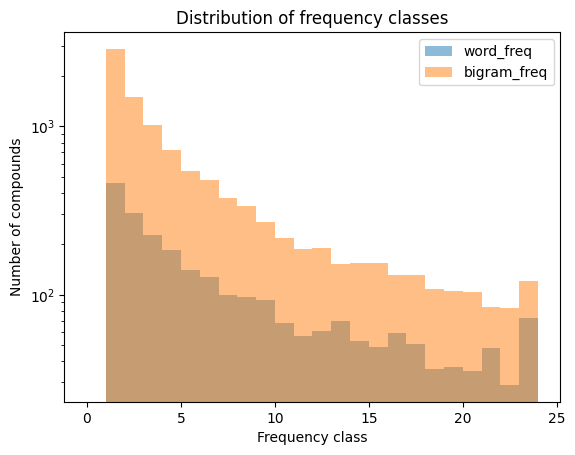

In [121]:
# Show the distribution of the frequency classes, for both word_freq and bigram_freq
import matplotlib.pyplot as plt

plt.hist(df_duplicate_free['word_freq'], bins=range(25), alpha=0.5, label='word_freq')
plt.hist(df_duplicate_free['bigram_freq'], bins=range(25), alpha=0.5, label='bigram_freq')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('Frequency class')
plt.ylabel('Number of compounds')
plt.title('Distribution of frequency classes')

# Result: Both distributions are very similar, only that there are more compounds with a bigram frequency than with a word frequency.